In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv("amazon_alexa.tsv",sep='\t')

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [9]:
len(df)

3071

In [6]:
b = []
for i,r,d,v,rev,f in df.itertuples():
    if rev.isspace():
        b.append(i)
print(len(b),b)

79 [85, 183, 219, 374, 406, 524, 654, 780, 878, 914, 1094, 1112, 1119, 1150, 1151, 1275, 1321, 1354, 1360, 1385, 1389, 1420, 1447, 1461, 1513, 1558, 1577, 1581, 1614, 1728, 1761, 1764, 1808, 1954, 1975, 1981, 1987, 2014, 2019, 2032, 2037, 2048, 2073, 2104, 2107, 2131, 2141, 2187, 2197, 2221, 2244, 2359, 2430, 2455, 2510, 2525, 2567, 2627, 2628, 2662, 2732, 2763, 2769, 2772, 2775, 2790, 2806, 2861, 2876, 2918, 2978, 2979, 3013, 3083, 3114, 3120, 3123, 3126, 3141]


In [8]:
df.drop(b,inplace=True)

In [12]:
df['feedback'].value_counts()

1    2833
0     238
Name: feedback, dtype: int64

In [13]:
sent_analyser = SentimentIntensityAnalyzer()

In [15]:
sent_analyser.polarity_scores(df.iloc[0]['verified_reviews'])

{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6696}

In [16]:
df['Scores'] = df['verified_reviews'].apply(lambda x:sent_analyser.polarity_scores(x))

In [17]:
df.head()

,rating,date,variation,verified_reviews,feedback,Scores
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'comp..."
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,"{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'comp..."
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"{'neg': 0.102, 'neu': 0.784, 'pos': 0.114, 'co..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [18]:
df['compound_score'] = df['Scores'].apply(lambda x: x['compound'])

In [20]:
df.head()

,rating,date,variation,verified_reviews,feedback,Scores,compound_score
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'comp...",0.6696
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,"{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'comp...",0.6360
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"{'neg': 0.102, 'neu': 0.784, 'pos': 0.114, 'co...",-0.1280
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp...",0.9169
4,5,31-Jul-18,Charcoal Fabric,Music,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [23]:
df['predicted_feedback'] = df['compound_score'].apply(lambda x: 1 if x>=0 else 0)

In [24]:
df.head()

,rating,date,variation,verified_reviews,feedback,Scores,compound_score,predicted_feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'comp...",0.6696,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,"{'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'comp...",0.6360,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"{'neg': 0.102, 'neu': 0.784, 'pos': 0.114, 'co...",-0.1280,0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383, 'comp...",0.9169,1
4,5,31-Jul-18,Charcoal Fabric,Music,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1


In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
print(confusion_matrix(df['feedback'],df['predicted_feedback']))

[[  97  141]
 [ 131 2702]]


In [27]:
print(classification_report(df['feedback'],df['predicted_feedback']))

             precision    recall  f1-score   support

          0       0.43      0.41      0.42       238
          1       0.95      0.95      0.95      2833

avg / total       0.91      0.91      0.91      3071



In [28]:
print(accuracy_score(df['feedback'],df['predicted_feedback']))

0.9114295017909476


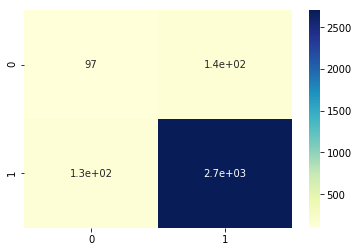

In [60]:
import seaborn as sb
sb.heatmap(confusion_matrix(df['feedback'],df['predicted_feedback']),annot=True,cmap="YlGnBu")

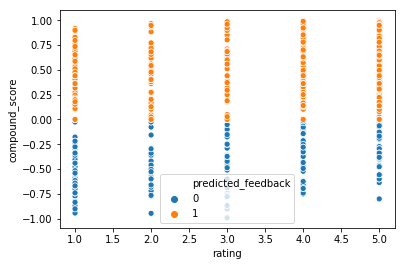

In [45]:
sb.scatterplot(df['rating'],df['compound_score'],hue=df['predicted_feedback'])

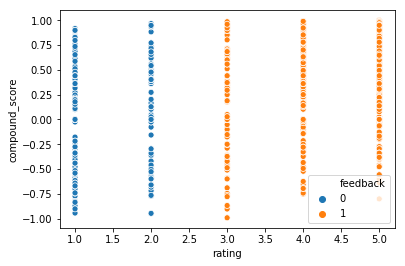

In [46]:
sb.scatterplot(df['rating'],df['compound_score'],hue=df['feedback'])

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\smrithi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of computed compound score')

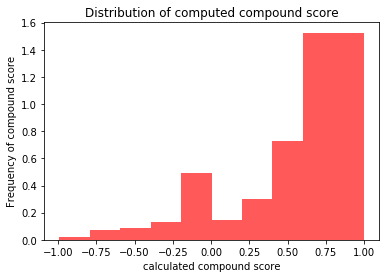

In [57]:
plt.hist(df['compound_score'],normed=1,facecolor='red',alpha=0.65)
plt.xlabel('calculated compound score')
plt.ylabel("Frequency of compound score")
plt.title("Distribution of computed compound score")